In [4]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

#Importing the Libraries

In [5]:
# lets import the basic Libraries
import numpy as np
import pandas as pd

# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# for jupyter notebook widgets
#import ipywidgets as widgets
#from ipywidgets import interact
#from ipywidgets import interact_manual

# for Interactive Shells
from IPython.display import display

# setting up the chart size and background
plt.rcParams['figure.figsize'] = (16, 8)
plt.style.use('fivethirtyeight')

#Loading the Data Set

In [6]:
# lets read the dataset
data = pd.read_csv('movie_metadata.csv')

#Shape of the Data

In [7]:
# lets check the shape
print(data.shape)

(5043, 28)


#Information about the Data Set

In [8]:
# lets check the column wise info

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [9]:
# lets remove unnecassary columns from the dataset

# Use the 'drop()' function to drop the unnecessary columns

data = data.drop(['color',
                      'director_facebook_likes',
                      'actor_3_facebook_likes',
                      'actor_1_facebook_likes',
                      'cast_total_facebook_likes',
                      'actor_2_facebook_likes',
                      'facenumber_in_poster',
                      'content_rating',
                      'country',
                      'movie_imdb_link',
                      'aspect_ratio',
                      'plot_keywords',
                      ],
                       axis = 1)
data.columns

Index(['director_name', 'num_critic_for_reviews', 'duration', 'actor_2_name',
       'gross', 'genres', 'actor_1_name', 'movie_title', 'num_voted_users',
       'actor_3_name', 'num_user_for_reviews', 'language', 'budget',
       'title_year', 'imdb_score', 'movie_facebook_likes'],
      dtype='object')

#Missing Values Imputation

In [10]:
# lets check the rows having high percentage of missing values in the dataset

round(100*(data.isnull().sum()/len(data.index)), 2)

director_name              2.06
num_critic_for_reviews     0.99
duration                   0.30
actor_2_name               0.26
gross                     17.53
genres                     0.00
actor_1_name               0.14
movie_title                0.00
num_voted_users            0.00
actor_3_name               0.46
num_user_for_reviews       0.42
language                   0.28
budget                     9.76
title_year                 2.14
imdb_score                 0.00
movie_facebook_likes       0.00
dtype: float64

In [11]:
# Since 'gross' and 'budget' columns have large number of NaN values, drop all the rows with NaNs at this column using the
# 'isnan' function of NumPy alongwith a negation '~'

data = data[~np.isnan(data['gross'])]
data = data[~np.isnan(data['budget'])]

# Now lets again check the Missing Values column wise
data.isnull().sum()

director_name              0
num_critic_for_reviews     1
duration                   1
actor_2_name               5
gross                      0
genres                     0
actor_1_name               3
movie_title                0
num_voted_users            0
actor_3_name              10
num_user_for_reviews       0
language                   4
budget                     0
title_year                 0
imdb_score                 0
movie_facebook_likes       0
dtype: int64

In [12]:
# The rows for which the sum of Null is less than two are retained

data = data[data.isnull().sum(axis=1) <= 2]
data.isnull().sum()

director_name             0
num_critic_for_reviews    1
duration                  1
actor_2_name              2
gross                     0
genres                    0
actor_1_name              0
movie_title               0
num_voted_users           0
actor_3_name              7
num_user_for_reviews      0
language                  4
budget                    0
title_year                0
imdb_score                0
movie_facebook_likes      0
dtype: int64

In [13]:
# lets impute the missing values

# using mean for numerical columns
data['num_critic_for_reviews'].fillna(data['num_critic_for_reviews'].mean(), inplace = True)
data['duration'].fillna(data['duration'].mean(), inplace = True)

# using mode for categorical column
data['language'].fillna(data['language'].mode()[0], inplace = True)

# As we know that We cannot use statistical values for imputing the missing values of actor names, so we will replace the
# actor names with "Unknown Actor"

data['actor_2_name'].fillna('Unknown Actor', inplace = True)
data['actor_3_name'].fillna('Unknown Actor', inplace = True)

# as we imputed all the missing values lets check the no. of total missing values in the dataset
data.isnull().sum().sum()

0

# Feature Modification

In [14]:
# Lets convert the gross and budget from $ to Million $ to make our analysis easier

data['gross'] = data['gross']/1000000
data['budget'] = data['budget']/1000000

In [15]:
# lets create a Profit column using the Budget and Gross

data['Profit'] = data['gross'] - data['budget']

# lets also check the name of Top 10 Profitable Movies
data[['Profit','movie_title']].sort_values(by = 'Profit', ascending  = False).head(10)

,Profit,movie_title
0,523.505847,Avatar
29,502.177271,Jurassic World
26,458.672302,Titanic
3024,449.935665,Star Wars: Episode IV - A New Hope
3080,424.449459,E.T. the Extra-Terrestrial
794,403.279547,The Avengers
17,403.279547,The Avengers
509,377.783777,The Lion King
240,359.544677,Star Wars: Episode I - The Phantom Menace
66,348.316061,The Dark Knight


In [16]:
# By looking at the above result we can easily analyze that there are some duplicate

# lets print the no. of rows before removing Duplicates
print("No. of Rows Before Removing Duplicates: ",data.shape[0])

# so lets remove all the duplicates from the data
data.drop_duplicates(subset = None, keep = 'first', inplace = True)

# lets print the no. of rows after removing Duplicates
print("No. of Rows After Removing Duplicates: ",data.shape[0])

No. of Rows Before Removing Duplicates:  3888
No. of Rows After Removing Duplicates:  3853


#Top 10 Movies with Highest profit

In [17]:
# Lets check the Top 10 Profitable Movies Again
data[['movie_title','Profit']].sort_values(by = 'Profit', ascending  = False).head(10)

,movie_title,Profit
0,Avatar,523.505847
29,Jurassic World,502.177271
26,Titanic,458.672302
3024,Star Wars: Episode IV - A New Hope,449.935665
3080,E.T. the Extra-Terrestrial,424.449459
17,The Avengers,403.279547
509,The Lion King,377.783777
240,Star Wars: Episode I - The Phantom Menace,359.544677
66,The Dark Knight,348.316061
439,The Hunger Games,329.999255


#Manupulating the Duration and Language Collumn

In [18]:
# lets check the values in the language column
data['language'].value_counts()

language
English       3674
French          37
Spanish         26
Mandarin        14
German          13
Japanese        12
Hindi           10
Cantonese        8
Italian          7
Portuguese       5
Korean           5
Norwegian        4
Thai             3
Hebrew           3
Persian          3
Danish           3
Dutch            3
Dari             2
Indonesian       2
Aboriginal       2
Arabic           1
Russian          1
Vietnamese       1
Dzongkha         1
Romanian         1
Zulu             1
Bosnian          1
Czech            1
Icelandic        1
Hungarian        1
Mongolian        1
Aramaic          1
Telugu           1
Kazakh           1
Maya             1
Filipino         1
Swedish          1
Name: count, dtype: int64

In [19]:
# Looking at the above output we can easily observe that out of 3,500 movies only 150 movies are of other languages

# so it is better to keep only two languages that is English and Foreign
def language(x):
    if x == 'English':
        return 'English'
    else:
        return 'Foreign'

# lets apply the function on the language column
data['language'] = data['language'].apply(language)

# lets check the values again
data['language'].value_counts()

language
English    3674
Foreign     179
Name: count, dtype: int64

In [20]:
# The Duration of Movies is not varying a lot but we know that most of the users either like watching long movies or short
# duration movies. we can categorize the movies in two part i.e., short and long.
# lets define a function for categorizing Duration of Movies
def duration(x):
    if x <= 120:
        return 'Short'
    else:
        return 'Long'

# lets apply this function on the duration column
data['duration'] = data['duration'].apply(duration)

# lets check the values of Duration column
data['duration'].value_counts()

duration
Short    2936
Long      917
Name: count, dtype: int64

In [21]:
# lets also check the values in the Genres Column

data['genres'].value_counts()

genres
Drama                                     153
Comedy|Drama|Romance                      151
Comedy|Drama                              147
Comedy                                    145
Comedy|Romance                            135
                                         ... 
Action|Crime|Drama|Thriller|War             1
Adventure|Comedy|Family|Musical             1
Action|Adventure|Family|Fantasy|Sci-Fi      1
Action|Drama|Mystery|Thriller|War           1
Comedy|Crime|Horror                         1
Name: count, Length: 762, dtype: int64

In [22]:
data['genres'].str.split('|')[0]

['Action', 'Adventure', 'Fantasy', 'Sci-Fi']

In [23]:
# we can see from the above output that most of the movies are having a lot of genres
# also, a movie can have so many genres so lets keep four genres

data['Moviegenres'] = data['genres'].str.split('|')
data['Genre1'] = data['Moviegenres'].apply(lambda x: x[0])

# Some of the movies have only one genre. In such cases, assign the same genre to 'genre_2' as well
data['Genre2'] = data['Moviegenres'].apply(lambda x: x[1] if len(x) > 1 else x[0])
data['Genre3'] = data['Moviegenres'].apply(lambda x: x[2] if len(x) > 2 else x[0])
data['Genre4'] = data['Moviegenres'].apply(lambda x: x[3] if len(x) > 3 else x[0])

# lets check the head of the  data
data[['genres','Genre1','Genre2','Genre3','Genre4']].head(5)

,genres,Genre1,Genre2,Genre3,Genre4
0,Action|Adventure|Fantasy|Sci-Fi,Action,Adventure,Fantasy,Sci-Fi
1,Action|Adventure|Fantasy,Action,Adventure,Fantasy,Action
2,Action|Adventure|Thriller,Action,Adventure,Thriller,Action
3,Action|Thriller,Action,Thriller,Action,Action
5,Action|Adventure|Sci-Fi,Action,Adventure,Sci-Fi,Action


#Data Visualisation

   index                          movie_title  Social_Media_Popularity
0     10  Batman v Superman: Dawn of Justice               1599.794424
1    150                        Ghostbusters               1076.336425
2   1582                        Ghostbusters               1075.827482
3     96                        Interstellar               1024.560802
4   3015               10 Days in a Madhouse                828.025478
5    945                      Into the Woods                692.937200
6     73                       Suicide Squad                652.816996
7   1190                Fifty Shades of Grey                624.306881
8    108                            Warcraft                622.790277
9     92        Independence Day: Resurgence                599.274128


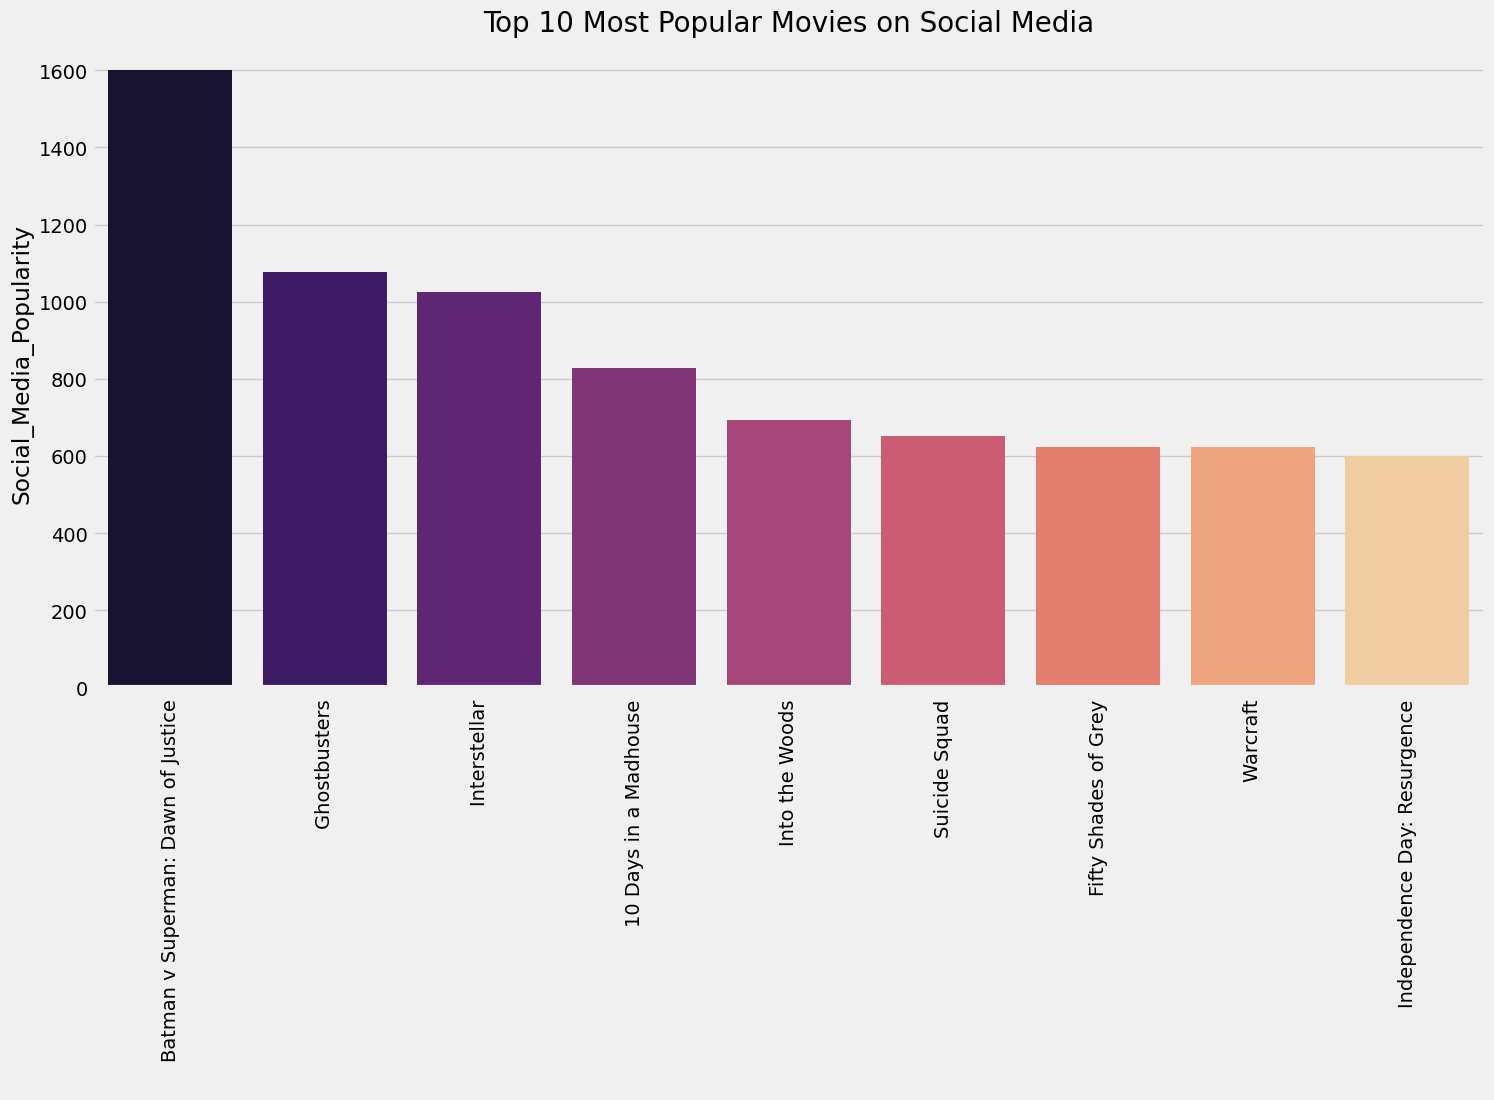

In [24]:
# lets also calculate the Social Media Popularity of a Movie

# to calculate popularity of a movie, we can aggregate No. of voted users, No. of Users for Reviews, and Facebook Likes.
data['Social_Media_Popularity'] = (data['num_user_for_reviews']/
                                   data['num_voted_users'])*data['movie_facebook_likes']

# lets also check the Top 10 Most Popular Movies on Social Media
x = data[['movie_title','Social_Media_Popularity']].sort_values(by = 'Social_Media_Popularity',
                                                                ascending = False).head(10).reset_index()
print(x)

sns.barplot(x=x['movie_title'], y=x['Social_Media_Popularity'],data=data, palette = 'magma')
plt.title('Top 10 Most Popular Movies on Social Media', fontsize = 20)
plt.xticks(rotation = 90, fontsize = 14)
plt.xlabel(' ')
plt.show()

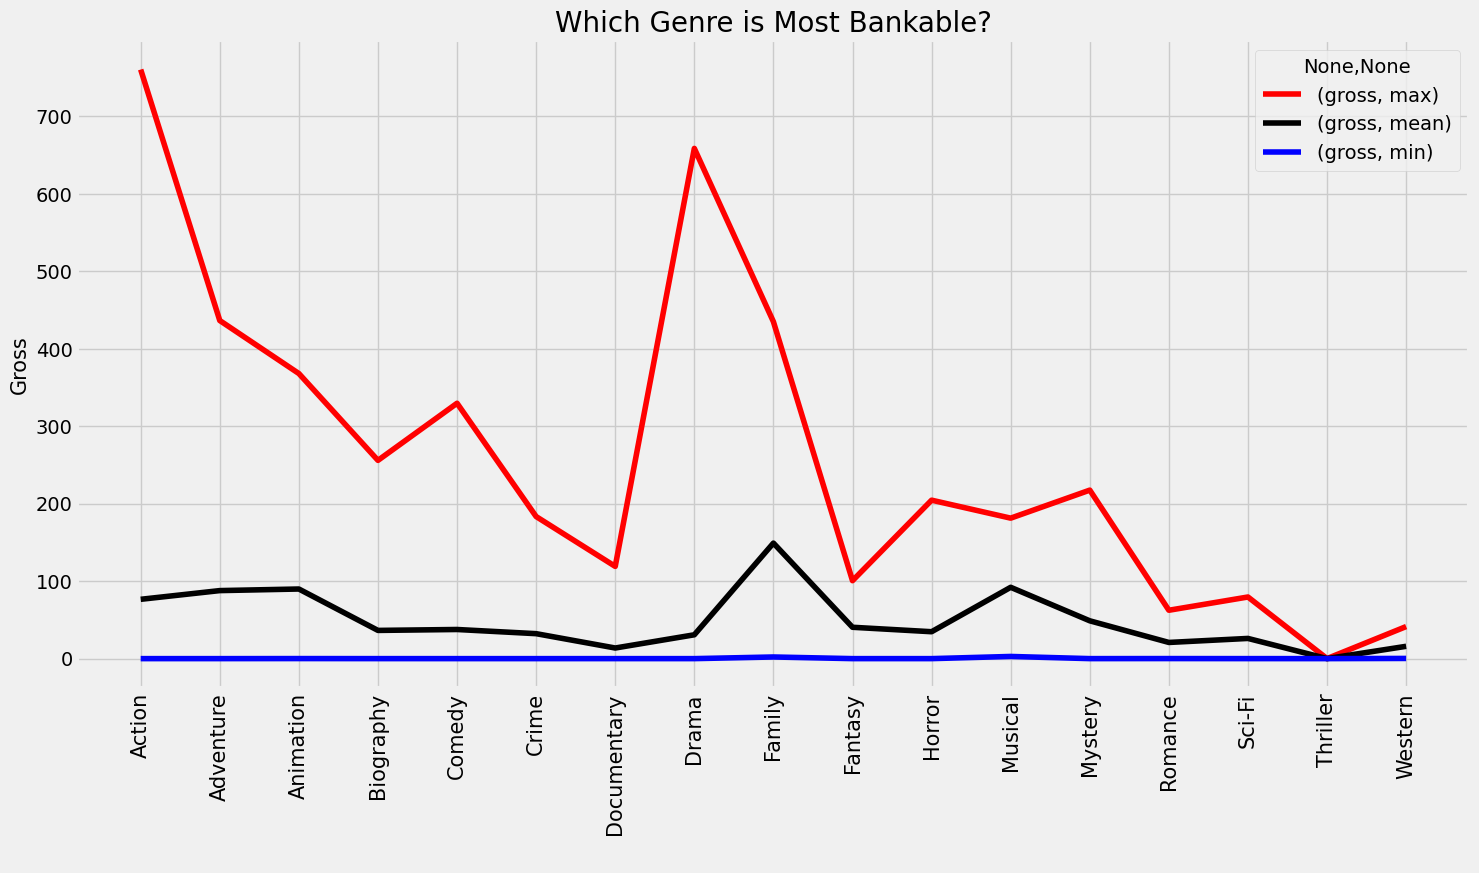

The Most Profitable Movie from each Genre


,Genre1,movie_title,gross
0,Action,Avatar,760.505847
509,Adventure,The Lion King,422.783777
521,Animation,Despicable Me 2,368.049635
1403,Biography,The Blind Side,255.950375
836,Comedy,Forrest Gump,329.691196
3466,Crime,The Godfather,134.821952
3583,Documentary,Fahrenheit 9/11,119.078393
26,Drama,Titanic,658.672302
3080,Family,E.T. the Extra-Terrestrial,434.949459
2485,Fantasy,The Others,96.471845


In [25]:
# Lets compare the Gross with Genres

# first group the genres and get max, min, and avg gross of the movies of that genre.)
display(data[['Genre1','gross',]].groupby(['Genre1']).agg(['max','mean','min']).style.background_gradient(cmap = 'Wistia'))

# lets plot these values using lineplot
data[['Genre1','gross',]].groupby(['Genre1']).agg(['max','mean','min']).plot(kind = 'line', color = ['red','black','blue'])
plt.title('Which Genre is Most Bankable?', fontsize = 20)
plt.xticks(np.arange(17), ['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'Horror', 'Musical',
       'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'Western'], rotation = 90, fontsize = 15)
plt.ylabel('Gross', fontsize = 15)
plt.xlabel(' ',)
plt.show()

print('The Most Profitable Movie from each Genre')
display(data.loc[data.groupby(data['Genre1'])['Profit'].idxmax()][['Genre1',
                                    'movie_title','gross']].style.background_gradient(cmap = 'copper'))

Most Profitable Years in Box Office


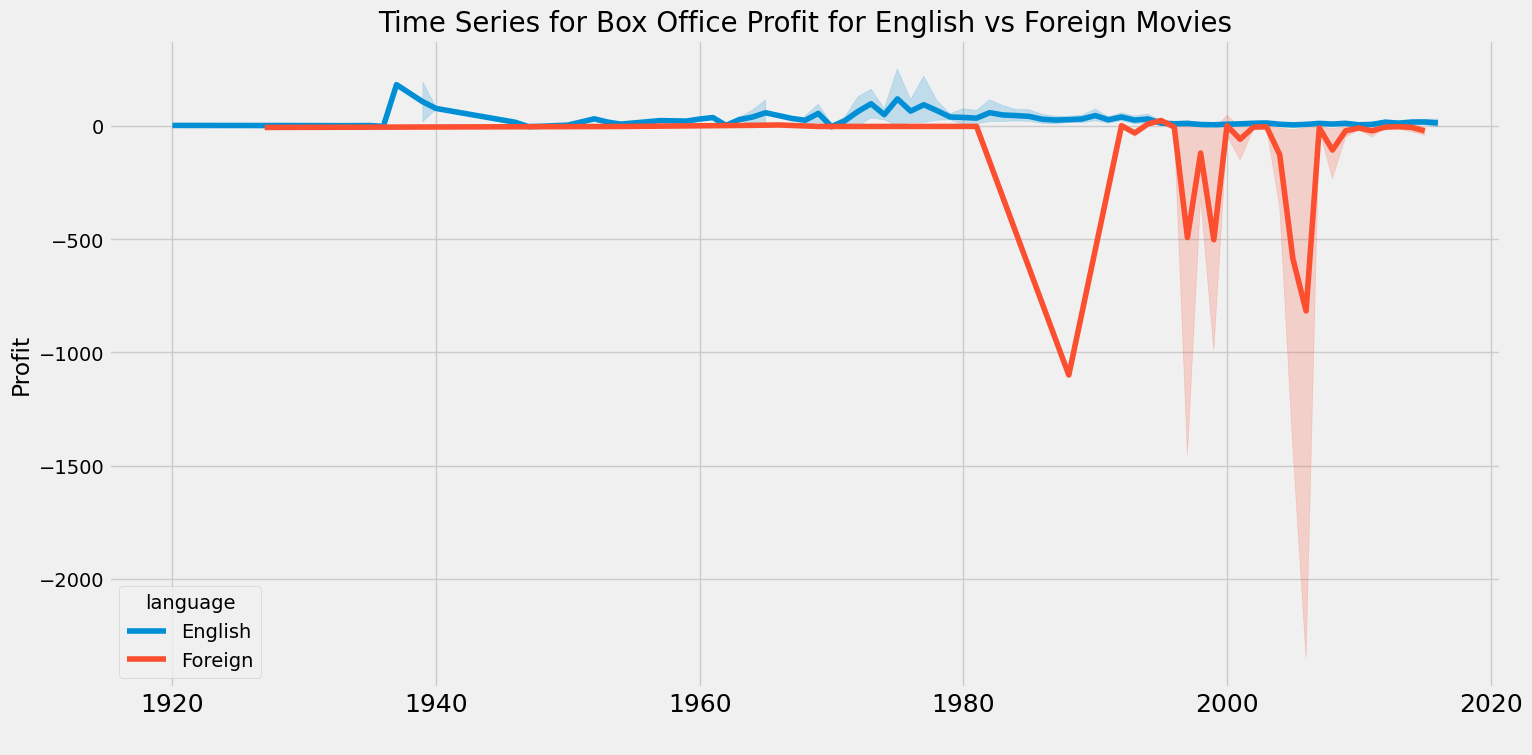

Movies that Made Huge Losses


,movie_title,language,Profit
2323,Princess Mononoke,Foreign,-2397.701809
2334,Steamboy,Foreign,-2127.109510
2988,The Host,Foreign,-12213.298588
3005,Fateless,Foreign,-2499.804112
3859,Lady Vengeance,Foreign,-4199.788333


In [26]:
# lets convert year into integer
data['title_year'] = data['title_year'].astype('int')

print('Most Profitable Years in Box Office')
display(data[['title_year','language','Profit']].groupby(['language',
                                    'title_year']).agg('sum').sort_values(by = 'Profit',
                                     ascending = False).head(10).style.background_gradient(cmap = 'Greens'))

# lets plot them
sns.lineplot(x=data['title_year'], y=data['Profit'], data=data,hue = data['language'])
plt.title('Time Series for Box Office Profit for English vs Foreign Movies', fontsize = 20)
plt.xticks(fontsize = 18)
plt.xlabel(' ')
plt.show()

print("Movies that Made Huge Losses")
display(data[data['Profit'] < -2000][['movie_title',
                        'language','Profit']].style.background_gradient(cmap = 'Reds'))

,movie_title,duration,gross,Profit
0,Avatar,Long,760.505847,523.505847
29,Jurassic World,Long,652.177271,502.177271
26,Titanic,Long,658.672302,458.672302
3024,Star Wars: Episode IV - A New Hope,Long,460.935665,449.935665
17,The Avengers,Long,623.279547,403.279547


,movie_title,duration,gross,Profit
3080,E.T. the Extra-Terrestrial,Short,434.949459,424.449459
509,The Lion King,Short,422.783777,377.783777
812,Deadpool,Short,363.024263,305.024263
521,Despicable Me 2,Short,368.049635,292.049635
338,Finding Nemo,Short,380.838870,286.838870


Text(0.5, 1.0, 'Gross Comparison')

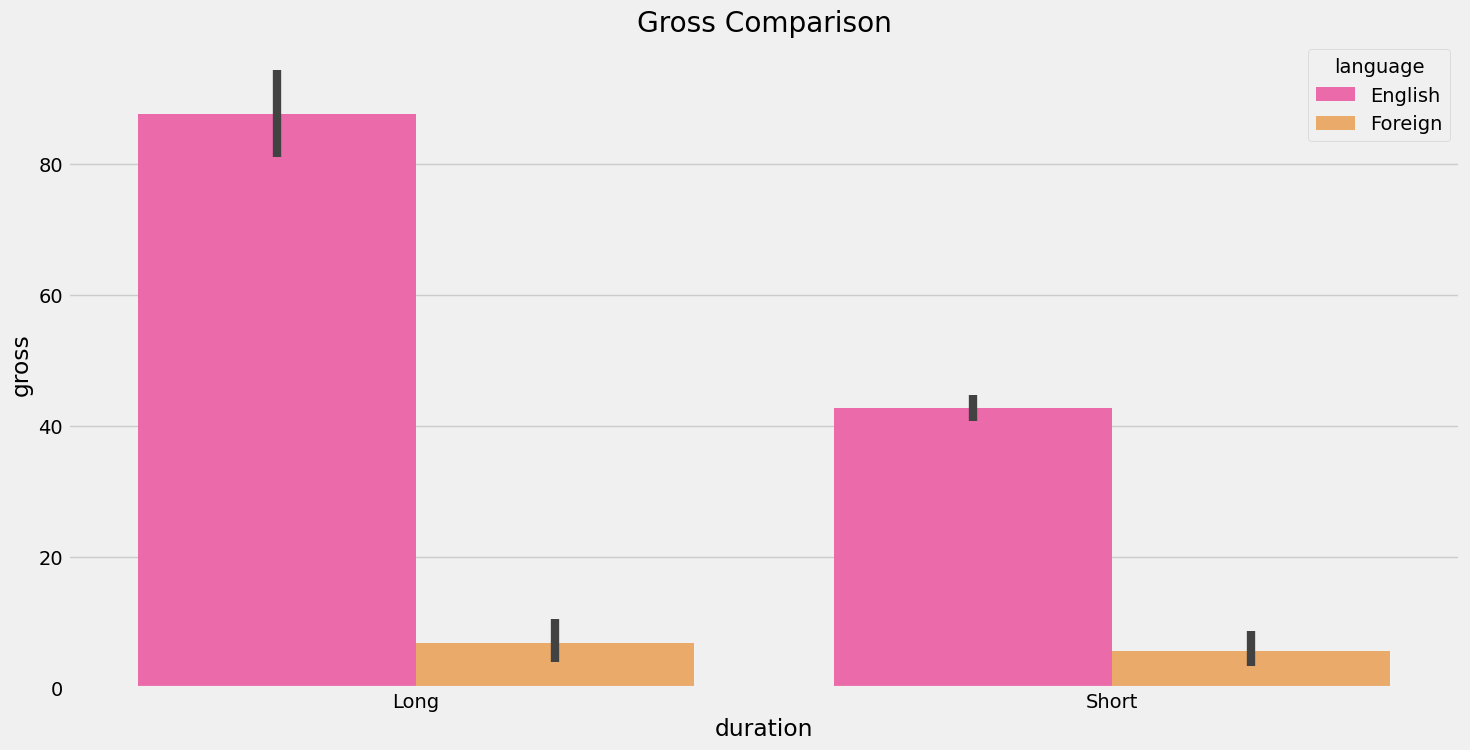

In [27]:
display(data[data['duration'] == 'Long'][['movie_title', 'duration', 'gross',
                    'Profit']].sort_values(by = 'Profit',ascending = False).head(5).style.background_gradient(cmap = 'spring'))

display(data[data['duration'] == 'Short'][['movie_title', 'duration', 'gross',
                    'Profit']].sort_values(by = 'Profit',ascending = False).head(5).style.background_gradient(cmap = 'spring'))

sns.barplot(x=data['duration'], y=data['gross'], data=data,hue = data['language'], palette = 'spring')
plt.title('Gross Comparison')

In [28]:
print("Average IMDB Score for Long Duration Movies is {0:.2f}".format(data[data['duration'] == 'Long']['imdb_score'].mean()))
print("Average IMDB Score for Short Duration Movies is {0:.2f}".format(data[data['duration'] == 'Short']['imdb_score'].mean()))


Average IMDB Score for Long Duration Movies is 7.06
Average IMDB Score for Short Duration Movies is 6.28


In [29]:
print("\nHighest Rated Long Duration Movie\n",
    data[data['duration'] == 'Long'][['movie_title','imdb_score']].sort_values(by = 'imdb_score', ascending = False).head(1))
print("\nHighest Rated Short Duration Movie\n",
    data[data['duration'] == 'Short'][['movie_title','imdb_score']].sort_values(by = 'imdb_score', ascending = False).head(1))



Highest Rated Long Duration Movie
                     movie_title  imdb_score
1937  The Shawshank Redemption          9.3

Highest Rated Short Duration Movie
               movie_title  imdb_score
3592  The Usual Suspects          8.6


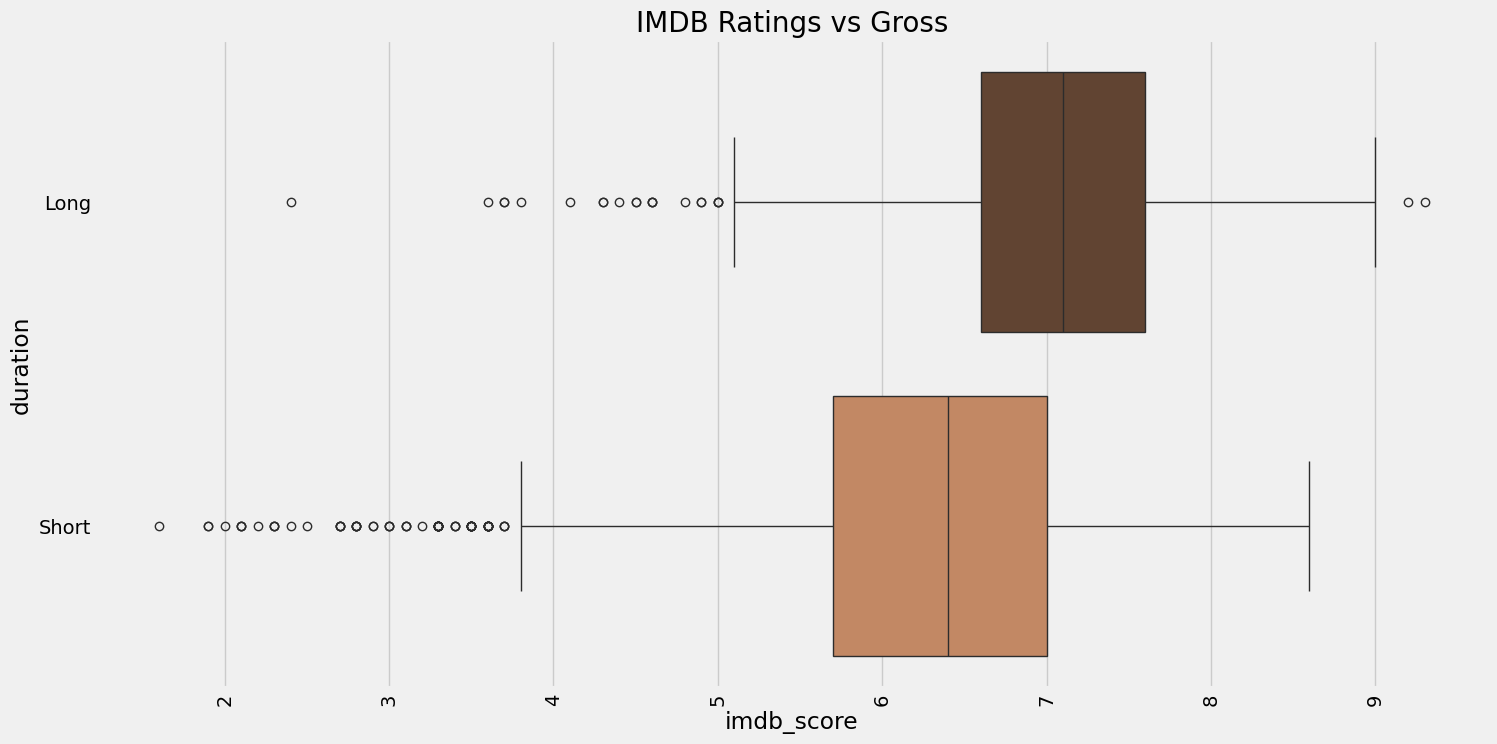

In [30]:
sns.boxplot(x=data['imdb_score'], y=data['duration'], data=data,palette = 'copper')
plt.title('IMDB Ratings vs Gross', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

In [36]:
def query_actors(x):
    a = data[data['actor_1_name'] == x]
    b = data[data['actor_2_name'] == x]
    c = data[data['actor_3_name'] == x]
    y = pd.concat([a, b, c])


    y = y[['movie_title',
       'budget',
       'gross',
       'title_year',
       'genres',
       'language',
       'imdb_score',
        ]]
    return y

In [37]:
query_actors('Matthew Perry')


,movie_title,budget,gross,title_year,genres,language,imdb_score
1221,17 Again,20.0,64.149837,2009,Comedy|Drama|Family|Fantasy|Romance,English,6.4
1741,Serving Sara,29.0,16.930185,2002,Comedy|Romance,English,5.3
2288,Three to Tango,20.0,10.544143,1999,Comedy|Romance,English,6.1
1691,The Whole Ten Yards,40.0,16.323969,2004,Comedy|Crime|Thriller,English,5.5
2024,The Whole Nine Yards,24.0,57.262492,2000,Comedy|Crime,English,6.7


In [40]:
def actors_report(x):
    a = data[data['actor_1_name'] == x]
    b = data[data['actor_2_name'] == x]
    c = data[data['actor_3_name'] == x]
    y = pd.concat([a, b, c])

    print("Time:",y['title_year'].min(), y['title_year'].max())
    print("Max Gross : {0:.2f} Millions".format(y['gross'].max()))
    print("Avg Gross : {0:.2f} Millions".format(y['gross'].mean()))
    print("Min Gross : {0:.2f} Millions".format(y['gross'].min()))
    print("Number of 100 Million Movies :", y[y['gross'] > 100].shape[0])
    print("Avg IMDB Score : {0:.2f}".format(y['imdb_score'].mean()))
    print("Most Common Genres:\n",y['Genre1'].value_counts().head())

actors_report('Meryl Streep')

Time: 1985 2014
Max Gross : 143.70 Millions
Avg Gross : 55.23 Millions
Min Gross : 9.66 Millions
Number of 100 Million Movies : 4
Avg IMDB Score : 6.81
Most Common Genres:
 Genre1
Drama        9
Comedy       7
Biography    3
Adventure    3
Action       1
Name: count, dtype: int64


In [41]:
# Lets compare Brad Pitt, Leonardo Caprio and Tom Cruise

def critically_acclaimed_actors(m):
    a = data[data['actor_1_name'] == m]
    b = data[data['actor_2_name'] == m]
    c = data[data['actor_3_name'] == m]
    y = pd.concat([a, b, c])

    return y['num_critic_for_reviews'].sum().astype('int')


print("Number of Critics Reviews for Brad Pitt")
display(critically_acclaimed_actors('Brad Pitt'))

print("Number of Critics Reviews for Leonardo DiCaprio")
display(critically_acclaimed_actors('Leonardo DiCaprio'))

print("Number of Critics Reviews for Tom Cruise")
display(critically_acclaimed_actors('Tom Cruise'))

Number of Critics Reviews for Brad Pitt


7814

Number of Critics Reviews for Leonardo DiCaprio


7014

Number of Critics Reviews for Tom Cruise


6740

In [42]:
!pip install ipywidgets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 14.8 MB/s eta 0:00:00


In [43]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [44]:
pd.set_option('display.max_rows', 3000)

@interact
def show_movies_more_than(column='imdb_score', score=9.0):
    x = data.loc[data[column] > score][[ 'title_year','movie_title',
                                       'director_name',
                                       'actor_1_name',
                                       'actor_2_name',
                                       'actor_3_name',
                                       'Profit',
                                       'imdb_score',
                                    ]]
    x = x.sort_values(by = 'imdb_score', ascending = False)
    x = x.drop_duplicates(keep = 'first')
    return x

interactive(children=(Text(value='imdb_score', description='column'), FloatSlider(value=9.0, description='scor…

In [45]:
pd.set_option('display.max_rows', 30000)

@interact
def show_articles_more_than(column=['budget','gross'], x=1000):
    return data.loc[data[column] > x][['movie_title','duration','gross','Profit','imdb_score']]

interactive(children=(Dropdown(description='column', options=('budget', 'gross'), value='budget'), IntSlider(v…

#Recommending Movies based on Languages

In [46]:
def recommend_lang(x):
    y = data[['language','movie_title','imdb_score']][data['language'] == x]
    y = y.sort_values(by = 'imdb_score', ascending = False)
    return y.head(15)

In [47]:
recommend_lang('Foreign')

,language,movie_title,imdb_score
4498,Foreign,"The Good, the Bad and the Ugly",8.9
4029,Foreign,City of God,8.7
4747,Foreign,Seven Samurai,8.7
2373,Foreign,Spirited Away,8.6
4921,Foreign,Children of Heaven,8.5
4259,Foreign,The Lives of Others,8.5
4659,Foreign,A Separation,8.4
1329,Foreign,Baahubali: The Beginning,8.4
1298,Foreign,Amélie,8.4
2323,Foreign,Princess Mononoke,8.4


#Recommending Movies Based on Actors

In [49]:
def recommend_movies_on_actors(x):
    a = data[['movie_title','imdb_score']][data['actor_1_name'] == x]
    b = data[['movie_title','imdb_score']][data['actor_2_name'] == x]
    c = data[['movie_title','imdb_score']][data['actor_3_name'] == x]
    a = pd.concat([a, b, c])

    a = a.sort_values(by = 'imdb_score', ascending = False)
    return a.head(15)

In [50]:
recommend_movies_on_actors('Leonardo DiCaprio')

,movie_title,imdb_score
97,Inception,8.8
361,The Departed,8.5
296,Django Unchained,8.5
308,The Wolf of Wall Street,8.2
179,The Revenant,8.1
452,Shutter Island,8.1
911,Catch Me If You Can,8.0
307,Blood Diamond,8.0
3058,What's Eating Gilbert Grape,7.8
26,Titanic,7.7


#Recommending similar Genres

In [51]:
from mlxtend.preprocessing import TransactionEncoder

x = data['genres'].str.split('|')
te = TransactionEncoder()
x = te.fit_transform(x)
x = pd.DataFrame(x, columns = te.columns_)

# lets check the head of x
x.head()

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,Music,Musical,Mystery,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,True,True,False,False,False,False,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
1,True,True,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [52]:
# lets convert this data into boolean so that we can perform calculations
genres = x.astype('int')

genres.head()

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,Music,Musical,Mystery,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [53]:
# now, lets insert the movie titles in the first column, so that we can better understand the data
genres.insert(0, 'movie_title', data['movie_title'])

genres.head()

,movie_title,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,...,Music,Musical,Mystery,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,Avatar,1,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,Pirates of the Caribbean: At World's End,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Spectre,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,The Dark Knight Rises,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,NaN,1,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [54]:
# lets set these movie titles as index of the data
genres = genres.set_index('movie_title')
genres.head()

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,Music,Musical,Mystery,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
movie_title,,,,,,,,,,,,,,,,,,,,,
Avatar,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
Pirates of the Caribbean: At World's End,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
Spectre,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
The Dark Knight Rises,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
NaN,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [55]:
# making a recommendation engine for getting similar genres

def recommendation_genres(gen):
    gen = genres[gen]
    similar_genres = genres.corrwith(gen)
    similar_genres = similar_genres.sort_values(ascending=False)
    similar_genres = similar_genres.iloc[1:]
    return similar_genres.head(3)

In [56]:
recommendation_genres('Documentary')

Short      0.086193
Music      0.075130
History    0.056416
dtype: float64

#Recommending similar Movies

In [57]:
# lets make a sparse matrix to recommend the movies

x = genres.transpose()
x

movie_title,Avatar,Pirates of the Caribbean: At World's End,Spectre,The Dark Knight Rises,NaN,John Carter,Spider-Man 3,Tangled,Avengers: Age of Ultron,Harry Potter and the Half-Blood Prince,...,Four Weddings and a Funeral,NaN,NaN,25th Hour,NaN,Bound,Requiem for a Dream,NaN,Tango,NaN
Action,1,1,1,1,1,1,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
Adventure,1,1,1,0,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
Animation,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Biography,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Comedy,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
Crime,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
Documentary,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Drama,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,1,0,1,1,0
Family,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
Fantasy,1,1,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
x.shape

(23, 3853)

In [59]:
# making a recommendation engine for getting similar movies

def recommendation_movie(movie):
    movie = x[movie+'\xa0']
    similar_movies = x.corrwith(movie)
    similar_movies = similar_movies.sort_values(ascending=False)
    similar_movies = similar_movies.iloc[1:]
    return similar_movies.head(20)


In [60]:
genres=x.copy()
genres

movie_title,Avatar,Pirates of the Caribbean: At World's End,Spectre,The Dark Knight Rises,NaN,John Carter,Spider-Man 3,Tangled,Avengers: Age of Ultron,Harry Potter and the Half-Blood Prince,...,Four Weddings and a Funeral,NaN,NaN,25th Hour,NaN,Bound,Requiem for a Dream,NaN,Tango,NaN
Action,1,1,1,1,1,1,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
Adventure,1,1,1,0,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
Animation,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Biography,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Comedy,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
Crime,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
Documentary,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Drama,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,1,0,1,1,0
Family,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
Fantasy,1,1,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
genres = genres.transpose()
genres.head()

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,Music,Musical,Mystery,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
movie_title,,,,,,,,,,,,,,,,,,,,,
Avatar,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
Pirates of the Caribbean: At World's End,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
Spectre,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
The Dark Knight Rises,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
NaN,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [62]:
# lets test on some results
recommendation_movie('John Carter')

movie_title
NaN                               1.000000
Back to the Future Part III       1.000000
John Carter                       1.000000
Rio                               1.000000
Grown Ups 2                       0.844097
A Christmas Carol                 0.844097
Skyfall                           0.844097
Rise of the Guardians             0.844097
The Craft                         0.844097
The Golden Compass                0.844097
The Great Gatsby                  0.844097
The Pirates! Band of Misfits      0.844097
Paranormal Activity 3             0.844097
No Strings Attached               0.844097
The Lost World: Jurassic Park     0.844097
Date Night                        0.844097
Hancock                           0.796819
Child's Play                      0.796819
Abandon                           0.796819
Superman III                      0.796819
dtype: float64

#**GENETIC ALGORITHM**

## Based on Movies

In [63]:
import numpy as np
import random

def fitness_function(weights, genres):
    genre_weights = np.array(weights)

    # Calculate recommendations based on genre similarity and weights.
    recommendations = np.dot(genres.values, genre_weights)

    return recommendations

def recommend_movies_by_genre(movie_name, genres, num_recommendations=10, population_size=25, mutation_rate=0.1, generations=50):

    # Ensure the movie_name exists in the dataset
    e=movie_name + '\xa0'
    if e not in genres.iloc[:, 0]:
        return "Movie not found in the dataset."

    population = np.random.uniform(0, 1, genres.shape[1])
   # print(population)
    for generation in range(generations):
        # Evaluate the fitness of each individual in the population.
        fitness_scores = fitness_function(population, genres)

        # Apply mutation to the best-performing individual
        max_fitness_index = np.argmax(fitness_scores)
        best_individual=0
        if max_fitness_index < len(population):
            best_individual = population[max_fitness_index]
        else:
            # Handle the case where the index is out of bounds
            pass
            #print("Error: Index out of bounds")

        mutation_values = np.random.uniform(-0.1, 0.1, genres.shape[1])
        new_individual = best_individual + mutation_values

        population = new_individual

    recommendations = fitness_function(population, genres)

    # Sort movies based on recommendations.
    top_movie_indices = np.argsort(recommendations)[::-1]

    # Exclude the input movie itself and get the top recommendations
    top_recommendations = genres.index[top_movie_indices[1:num_recommendations + 1]]

    return top_recommendations

# Example usage:
movie_name = 'Avatar'
recommended_movies = recommend_movies_by_genre(movie_name, genres)
print(f"Top 10 Movie Recommendations for '{movie_name}':")
print(recommended_movies)


Top 10 Movie Recommendations for 'Avatar':
Index(['Mad Money ', 'A Mighty Heart ', 'Oceans ', 'Contraband ',
       'Grindhouse ', 'The Eye ', 'Paul ', 'Project Almanac ', 'Grudge Match ',
       'Rise of the Planet of the Apes '],
      dtype='object', name='movie_title')


In [64]:
def precision(actual, recommended):
    true_positives = len(set(actual) & set(recommended))
    if len(recommended) == 0:
        return 0
    return true_positives / len(recommended)

def recall(actual, recommended):
    true_positives = len(set(actual) & set(recommended))
    if len(actual) == 0:
        return 0
    return true_positives / len(actual)

def f1_score(actual, recommended):
    precision_val = precision(actual, recommended)
    recall_val = recall(actual, recommended)
    if precision_val + recall_val == 0:
        return 0
    return 2 * (precision_val * recall_val) / (precision_val + recall_val)


## Based on Popularity

In [65]:
import numpy as np
import random

# Define your fitness function for the recommendation system.
def fitness_function(weights):
    imdb_weight, social_media_weight = weights

    # Combine 'imdb_score' and 'Social_Media_Popularity' using the weights.
    recommendations = data['imdb_score'] * imdb_weight + data['Social_Media_Popularity'] * social_media_weight

    # Sort movies based on the recommendations.
    top_recommendations = data[['movie_title', 'imdb_score', 'Social_Media_Popularity']].copy()
    top_recommendations['Recommendation Score'] = recommendations

    # Sort by the recommendation score in descending order.
    top_recommendations = top_recommendations.sort_values(by='Recommendation Score', ascending=False)

    # Calculate the quality of recommendations (e.g., precision, recall, F1-score).
    # You can use any relevant metric for your task.

    # For simplicity, let's calculate the mean recommendation score.
    mean_recommendation_score = top_recommendations['Recommendation Score'].mean()

    # Return the mean recommendation score to maximize in the genetic algorithm.
    return mean_recommendation_score

# Define the genetic algorithm parameters.
population_size = 50
mutation_rate = 0.1
generations = 100

# Initialize the population with random weights.
population = [(np.random.uniform(0, 1), np.random.uniform(0, 1)) for _ in range(population_size)]

# Main loop for genetic algorithm.
for generation in range(generations):
    # Evaluate the fitness of each individual in the population.
    fitness_scores = [fitness_function(weights) for weights in population]

    # Select the top-performing individuals to become parents
    parents = np.argsort(fitness_scores)[-population_size // 2:]

    # Create a new population through crossover and mutation
    new_population = []

    for _ in range(population_size // 2):
        parent1 = random.choice(parents)
        parent2 = random.choice(parents)

        # Perform crossover to create a new individual (combine weights)
        crossover_point = random.randint(0, 1)
        new_individual = (population[parent1][0] if crossover_point == 0 else population[parent2][0],
                          population[parent1][1] if crossover_point == 1 else population[parent2][1])

        # Apply mutation with a certain probability (change weights)
        if random.random() < mutation_rate:
            mutation_value = (random.uniform(-0.1, 0.1), random.uniform(-0.1, 0.1))
            new_individual = (new_individual[0] + mutation_value[0], new_individual[1] + mutation_value[1])

        new_population.append(new_individual)

    population = new_population

# Find the best solution after optimization
best_weights = population[np.argmax(fitness_scores)]

print("Optimal weights for 'imdb_score' and 'Social_Media_Popularity':", best_weights)

# Generate movie recommendations based on the optimal weights
imdb_weight, social_media_weight = best_weights
recommendations = data['imdb_score'] * imdb_weight + data['Social_Media_Popularity'] * social_media_weight

# Sort movies based on recommendations
top_recommendations = data[['movie_title', 'imdb_score', 'Social_Media_Popularity']].copy()
top_recommendations['Recommendation Score'] = recommendations

# Sort by the recommendation score in descending order
top_recommendations = top_recommendations.sort_values(by='Recommendation Score', ascending=False)

# Display the top recommended movies
top_10_recommendations = top_recommendations[['movie_title', 'Recommendation Score']].head(10)
print("Top 10 Movie Recommendations:")
print(top_10_recommendations)


Optimal weights for 'imdb_score' and 'Social_Media_Popularity': (1.475103849019505, 0.5651338618812493)
Top 10 Movie Recommendations:
                              movie_title  Recommendation Score
10    Batman v Superman: Dawn of Justice             914.276218
150                         Ghostbusters             616.387232
1582                        Ghostbusters             616.099611
96                          Interstellar             591.699896
3015               10 Days in a Madhouse             479.008515
945                       Into the Woods             400.452899
73                         Suicide Squad             379.107207
108                             Warcraft             362.728132
1190                Fifty Shades of Grey             358.864885
92          Independence Day: Resurgence             346.783174


## Based on Actor Name

In [66]:
import numpy as np
import random

# Ask the user for the specific actor they are interested in.
user_actor = input("Enter the actor's name for recommendations: ")

# Define your fitness function for the recommendation system.
def fitness_function(weights):
    imdb_weight, social_media_weight = weights

    # Filter movies that involve the user-specified actor.
    actor_filter = data['actor_1_name'] == user_actor

    # Combine 'imdb_score' and 'Social_Media_Popularity' using the weights.
    recommendations = data[actor_filter]['imdb_score'] * imdb_weight + data[actor_filter]['Social_Media_Popularity'] * social_media_weight

    # Sort movies based on the recommendations.
    top_recommendations = data[actor_filter][['movie_title', 'imdb_score', 'Social_Media_Popularity']].copy()
    top_recommendations['Recommendation Score'] = recommendations

    # Sort by the recommendation score in descending order.
    top_recommendations = top_recommendations.sort_values(by='Recommendation Score', ascending=False)

    # Calculate the quality of recommendations (e.g., precision, recall, F1-score).
    # You can use any relevant metric for your task.

    # For simplicity, let's calculate the mean recommendation score.
    mean_recommendation_score = top_recommendations['Recommendation Score'].mean()

    # Return the mean recommendation score to maximize in the genetic algorithm.
    return mean_recommendation_score

# Define the genetic algorithm parameters.
population_size = 50
mutation_rate = 0.1
generations = 100

# Initialize the population with random weights.
population = [(np.random.uniform(0, 1), np.random.uniform(0, 1)) for _ in range(population_size)]

# Main loop for genetic algorithm.
for generation in range(generations):
    # Evaluate the fitness of each individual in the population.
    fitness_scores = [fitness_function(weights) for weights in population]

    # Select the top-performing individuals to become parents
    parents = np.argsort(fitness_scores)[-population_size // 2:]

    # Create a new population through crossover and mutation
    new_population = []

    for _ in range(population_size // 2):
        parent1 = random.choice(parents)
        parent2 = random.choice(parents)

        # Perform crossover to create a new individual (combine weights)
        crossover_point = random.randint(0, 1)
        new_individual = (population[parent1][0] if crossover_point == 0 else population[parent2][0],
                          population[parent1][1] if crossover_point == 1 else population[parent2][1])

        # Apply mutation with a certain probability (change weights)
        if random.random() < mutation_rate:
            mutation_value = (random.uniform(-0.1, 0.1), random.uniform(-0.1, 0.1))
            new_individual = (new_individual[0] + mutation_value[0], new_individual[1] + mutation_value[1])

        new_population.append(new_individual)

    population = new_population

# Find the best solution after optimization
best_weights = population[np.argmax(fitness_scores)]

print("Optimal weights for 'imdb_score' and 'Social_Media_Popularity' based on the genetic algorithm:", best_weights)

# Generate movie recommendations based on the optimal weights
imdb_weight, social_media_weight = best_weights
recommendations = data['imdb_score'] * imdb_weight + data['Social_Media_Popularity'] * social_media_weight

# Filter movies that involve the user-specified actor
actor_filter = data['actor_1_name'] == user_actor
top_recommendations = data[actor_filter][['movie_title', 'imdb_score', 'Social_Media_Popularity']].copy()
top_recommendations['Recommendation Score'] = recommendations

# Sort by the recommendation score in descending order
top_recommendations = top_recommendations.sort_values(by='Recommendation Score', ascending=False)

# Display the top recommended movies
top_recommendations = top_recommendations[['movie_title', 'Recommendation Score']].head(10)
print("Top Movie Recommendations for", user_actor)
print(top_recommendations)


Enter the actor's name for recommendations: Meryl Streep
Optimal weights for 'imdb_score' and 'Social_Media_Popularity' based on the genetic algorithm: (0.8193124038738445, 1.1200222689789956)
Top Movie Recommendations for Meryl Streep
                    movie_title  Recommendation Score
2781             The Iron Lady              90.952301
1204             Julie & Julia              56.618314
3135  A Prairie Home Companion              16.468962
1674            One True Thing              13.734967
1925                 The Hours               6.226774
1575             Out of Africa               5.899049
1408     The Devil Wears Prada               5.571324
410           It's Complicated               5.407462
1106            The River Wild               5.161668
1618              Hope Springs               5.161668


## Based on Genre

In [70]:
import numpy as np
import random

# Ask the user for the specific genre they are interested in.
user_genre = input("Enter the genre for recommendations: ")

# Define your fitness function for the recommendation system.
def fitness_function(weights):
    imdb_weight, social_media_weight = weights

    # Filter movies that belong to the user-specified genre.
    genre_filter = data['Genre1'] == user_genre

    # Combine 'imdb_score' and 'Social_Media_Popularity' using the weights.
    recommendations = data[genre_filter]['imdb_score'] * imdb_weight + data[genre_filter]['Social_Media_Popularity'] * social_media_weight

    # Sort movies based on the recommendations.
    top_recommendations = data[genre_filter][['movie_title', 'imdb_score', 'Social_Media_Popularity']].copy()
    top_recommendations['Recommendation Score'] = recommendations

    # Sort by the recommendation score in descending order.
    top_recommendations = top_recommendations.sort_values(by='Recommendation Score', ascending=False)

    # Calculate the quality of recommendations (e.g., precision, recall, F1-score).
    # You can use any relevant metric for your task.

    # For simplicity, let's calculate the mean recommendation score.
    mean_recommendation_score = top_recommendations['Recommendation Score'].mean()

    # Return the mean recommendation score to maximize in the genetic algorithm.
    return mean_recommendation_score

# Define the genetic algorithm parameters.
population_size = 50
mutation_rate = 0.1
generations = 100

# Initialize the population with random weights.
population = [(np.random.uniform(0, 1), np.random.uniform(0, 1)) for _ in range(population_size)]

# Main loop for genetic algorithm.
for generation in range(generations):
    # Evaluate the fitness of each individual in the population.
    fitness_scores = [fitness_function(weights) for weights in population]

    # Select the top-performing individuals to become parents.
    parents = np.argsort(fitness_scores)[-population_size // 2:]

    # Create a new population through crossover and mutation.
    new_population = []

    for _ in range(population_size // 2):
        parent1 = random.choice(parents)
        parent2 = random.choice(parents)

        # Perform crossover to create a new individual (combine weights).
        crossover_point = random.randint(0, 1)
        new_individual = (population[parent1][0] if crossover_point == 0 else population[parent2][0],
                          population[parent1][1] if crossover_point == 1 else population[parent2][1])

        # Apply mutation with a certain probability (change weights).
        if random.random() < mutation_rate:
            mutation_value = (random.uniform(-0.1, 0.1), random.uniform(-0.1, 0.1))
            new_individual = (new_individual[0] + mutation_value[0], new_individual[1] + mutation_value[1])

        new_population.append(new_individual)

    population = new_population

# Find the best solution after optimization.
best_weights = population[np.argmax(fitness_scores)]

print(f"Optimal weights for 'imdb_score' and 'Social_Media_Popularity' based on the genetic algorithm for genre '{user_genre}': {best_weights}")

# Generate movie recommendations based on the optimal weights.
imdb_weight, social_media_weight = best_weights
recommendations = data['imdb_score'] * imdb_weight + data['Social_Media_Popularity'] * social_media_weight

# Filter movies that belong to the user-specified genre.
genre_filter = data['Genre1'] == user_genre
top_recommendations = data[genre_filter][['movie_title', 'imdb_score', 'Social_Media_Popularity']].copy()
top_recommendations['Recommendation Score'] = recommendations

# Sort by the recommendation score in descending order.
top_recommendations = top_recommendations.sort_values(by='Recommendation Score', ascending=False)

# Display the top recommended movies.
top_10_recommendations = top_recommendations[['movie_title', 'Recommendation Score']].head(10)
print(f"Top 10 Movie Recommendations for genre '{user_genre}':")
print(top_10_recommendations)


Enter the genre for recommendations: Comedy
Optimal weights for 'imdb_score' and 'Social_Media_Popularity' based on the genetic algorithm for genre 'Comedy': (1.3523343466587512, 0.8317715358617133)
Top 10 Movie Recommendations for genre 'Comedy':
                                           movie_title  Recommendation Score
2414  Birdman or (The Unexpected Virtue of Ignorance)             274.791204
4751                                           Rubber             256.247336
1546                                  This Is the End             182.874481
134                                      Dark Shadows             172.524779
2089                         The Hundred-Foot Journey             169.876491
617                                      Rock of Ages             165.598774
2181                                         Bad Moms             157.042340
3108                   The Best Exotic Marigold Hotel             150.897443
1173                                    The Interview      